<a href="https://colab.research.google.com/github/kmayutrisna/SA_IMDB/blob/main/Yelp_keras_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary library
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import re

In [2]:
#Get the dataset from gdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Display top of data
yelp_train = pd.read_csv("drive/My Drive/data/train_yelp.csv")
yelp_test =pd.read_csv("drive/My Drive/data/test_yelp.csv")

In [4]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [5]:
# Text preprocessing
from nltk.corpus import stopwords
def preprocess_text(text):

    # Text cleaning
    text = re.sub('[^a-zA-Z]', ' ', text)

    #Single character removal
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)

    #Remove multiple spaces
    text = re.sub(r'\s+', ' ', text)

    # Lowercasing
    text = text.lower()

    # Lowercasing
    text = text.split()

    # Stopword removal
    stop_words = set(stopwords.words('english'))
    text = [word for word in text if not word in stop_words]

    # Join the tokens back to a single string
    text = ' '.join(text)
    return text

In [6]:
# Preprocess the text column
yelp_train['text'] = yelp_train['text'].apply(preprocess_text)
yelp_test['text'] = yelp_test['text'].apply(preprocess_text)

In [7]:
X_train = yelp_train['text'].values
y_train = yelp_train['label'].values
X_test = yelp_test['text'].values  # Change 'data' to 'data_test'
y_test = yelp_test['label'].values  # Change 'data' to 'data_test'

In [9]:
# Tokenization and Padding
max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

sequences_train= tokenizer.texts_to_sequences(X_train)
sequences_train = pad_sequences(sequences_train, maxlen=max_len)

sequences_test = tokenizer.texts_to_sequences(X_test)
sequences_test = pad_sequences(sequences_test, maxlen=max_len)

In [10]:
# Build CNN Model with Keras Embedding Layer
model = keras.Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(5),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
# Train the Model
epochs = 5
batch_size = 64

history = model.fit(sequences_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Epoch 1/5
7000/7000 [==============================] - 834s 119ms/step - loss: 0.2093 - accuracy: 0.9143 - val_loss: 0.1563 - val_accuracy: 0.9379
Epoch 2/5
7000/7000 [==============================] - 823s 118ms/step - loss: 0.1563 - accuracy: 0.9384 - val_loss: 0.1545 - val_accuracy: 0.9390
Epoch 3/5
7000/7000 [==============================] - 867s 124ms/step - loss: 0.1109 - accuracy: 0.9582 - val_loss: 0.1783 - val_accuracy: 0.9341
Epoch 4/5
7000/7000 [==============================] - 849s 121ms/step - loss: 0.0674 - accuracy: 0.9753 - val_loss: 0.2110 - val_accuracy: 0.9313
Epoch 5/5
7000/7000 [==============================] - 822s 117ms/step - loss: 0.0424 - accuracy: 0.9840 - val_loss: 0.2796 - val_accuracy: 0.9288


In [13]:
# Evaluate the Model
y_pred = model.predict(sequences_test)
y_pred = (y_pred > 0.5).astype(int)


1188/1188 [==============================] - 20s 16ms/step


In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"F1 Score: {f1*100:.2f}%")

Accuracy: 92.20%
Precision: 92.52%
Recall: 91.82%
F1 Score: 92.17%


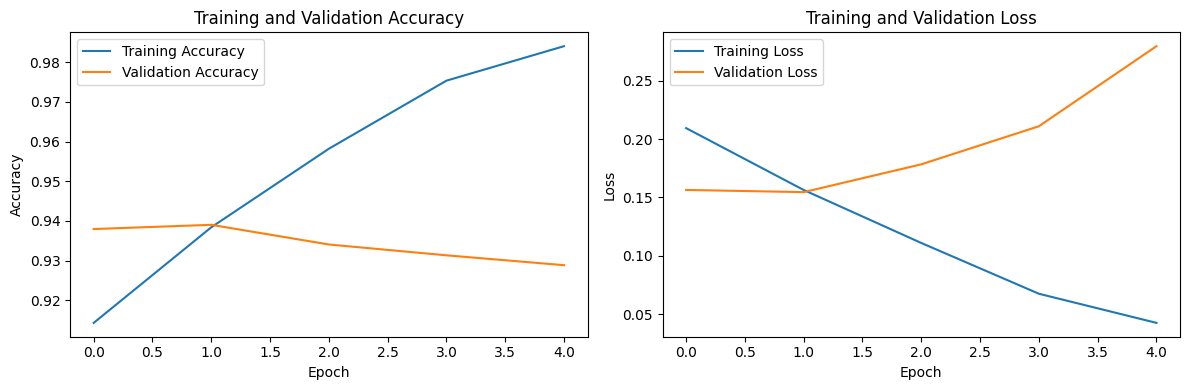

In [15]:
# Plot Training History (Accuracy and Loss)
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()
